# Redes Lógicas Tensoriais com LTNTorch: Uma Introdução com Exemplos Práticos


## O que é uma Rede Lógica Tensorial (LTN)?
O LTN é um framework Neuro-Simbólico (NeSi) que combina efetivamente o poder do deep learning (Tensores) com o rigor do raciocínio
lógico (Lógica).

### A Ideia Central
Definir uma base de conhecimento lógico (KB)
e usá-la como a função objetivo (ou função de perda) para um modelo neural.

### Como isso é Possível?
Isso é possível usando lógica fuzzy, que relaxa os valores de verdade clássicos (Verdadeiro/Falso ou 1/0)
para um intervalo contínuo $[0, 1]$.

Isso torna as operações lógicas diferenciáveis, permitindo o aprendizado através da otimização padrão de
gradient descent (descida de gradiente).


### O Conceito Fundamental: Lógica Real (Real Logic)
LTN é baseado em uma linguagem formal chamada "Lógica Real" (Real Logic).

- Domínios: São interpretados como Tensores no corpo dos números reais $\mathbb{R}^n$ (incluindo escalares, vetores, matrizes, etc.).
- "Aterramento" (Grounding, $\mathcal{G}$): Este é o termo do LTN para a "interpretação" da lógica. Ele mapeia símbolos lógicos para tensores e funções diferenciáveis:
    - Constantes (ex: 'a', 'b') $\rightarrow$ Tensores (ex: vetores de embedding em $\mathbb{R}^d$).
    - Predicados (ex: 'P(x)') $\rightarrow$ Funções Diferenciáveis (ex: uma rede neural) que mapeiam tensores para um valor de verdade em $[0, 1]$.Ex: $P: \mathbb{R}^d \rightarrow [0, 1]$
    - Funções (ex: 'f(x)') $\rightarrow$ Funções Diferenciáveis (ex: uma rede neural) que mapeiam tensores para outros tensores.Ex: $f: \mathbb{R}^d \rightarrow \mathbb{R}^m$

## Tornando a Lógica Diferenciável: Operadores Fuzzy

Para que o backpropagation funcione, precisamos substituir os operadores lógicos clássicos ($\land, \lor, \lnot, \forall, \exists, \implies$) por versões "fuzzy" que sejam diferenciáveis.

Conectivos (t-normas, t-conormas)
* Conjunção ($\land$): t-norma do produto:$\mathcal{A}_{\land}(u, v) = u \cdot v$
* Disjunção ($\lor$): t-conorma do produto:$\mathcal{A}_{\lor}(u, v) = u + v - u \cdot v$
* Negação ($\lnot$): Negação padrão:$\mathcal{A}_{\lnot}(u) = 1 - u$
* Implicação ($\implies$): Implicação de Reichenbach:$\mathcal{A}_{\implies}(u, v) = 1 - u + u \cdot v$

Quantificadores (Agregadores)
- Universal ($\forall x$): Média generalizada (p-mean error):$\mathcal{A}_{\forall}(u_1, ..., u_n) = 1 - \left(\frac{1}{n}\sum_{i=1}^{n}(1-u_{i})^{p}\right)^{\frac{1}{p}}$
- Existencial ($\exists x$): Média generalizada (p-mean):$\mathcal{A}_{\exists}(u_1, ..., u_n) = \left(\frac{1}{n}\sum_{i=1}^{n}u_{i}^{p}\right)^{\frac{1}{p}}$

Ponto Chave: Todas estas operações são diferenciáveis, permitindo-nos propagar gradientes através de fórmulas lógicas complexas.
    

O Framework LTNtorch

LTNtorch é a implementação prática desses conceitos em PyTorch. Ele fornece os blocos de construção fundamentais:
- ltn.Constant: Um tensor que representa uma constante lógica (ex: um embedding fixo).
- ltn.Variable: Um tensor para variáveis (ex: 'x', 'y') que serão usadas em quantificadores.
- ltn.Predicate: Um torch.nn.Module que retorna um valor em $[0, 1]$. É aqui que a rede neural "aprende".
- ltn.Function: Um torch.nn.Module que retorna um tensor.
- ltn.Connective: And, Or, Not, Implies.ltn.
- Quantifier: Forall, Exists.ltn.
- Aggregator: SatAgg (Agrega o nível de satisfação de todas as fórmulas na Base de Conhecimento).

O Processo de Aprendizado em 5 PassosO fluxo de trabalho para treinar um modelo LTN é o seguinte:

1. Definir a Base de Conhecimento (KB): Escreva seus axiomas (conhecimento prévio) usando os componentes do LTNtorch.
2. Aterramento (Grounding): Alimente os dados de treinamento (tensores PyTorch) nas ltn.Variable das fórmulas.
3. Avaliação: Calcule o nível de satisfação de toda a KB (um único valor em $[0, 1]$) usando SatAgg.
4. Cálculo da Perda (Loss): A perda é simplesmente $Loss = 1.0 - SatAgg(\text{KB})$. Nosso objetivo é minimizar essa perda, o que equivale a maximizar a satisfação da lógica.
5. Otimização: Use um otimizador padrão do PyTorch (como Adam) para fazer o backpropagate da perda e atualizar os parâmetros dos ltn.Predicate (as redes neurais).

## Tutorial Prático: Classificação de Imagens (Gatos vs. Cachorros)

Vamos aplicar esses conceitos a um problema clássico de visão computacional.

**Problema:** Classificar imagens em duas classes: **Cachorro** (classe positiva) e **Gato** (classe negativa/Não-Cachorro).

**Configuração do LTN:**

1. **Predicado:** Precisamos de um predicado $Dog(x)$ que aprenda a pergunta: *"A imagem x contém um cachorro?"*. Vamos usar uma **Rede Neural Convolucional (SimpleCNN)** para isso, em vez de um MLP simples.

2. **Variáveis:** Precisamos de variáveis lógicas para representar nossos lotes de dados:
   * $x_{dog}$ (imagens de cachorros).
   * $x_{cat}$ (imagens de gatos).

3. **Base de Conhecimento (Axiomas):**
   * **Axioma 1:** Todas as imagens de cachorros devem satisfazer o predicado *Dog*.
     * $\forall x_{dog} (Dog(x_{dog}))$
   * **Axioma 2:** Todas as imagens de gatos **NÃO** devem satisfazer o predicado *Dog*.
     * $\forall x_{cat} (\lnot Dog(x_{cat}))$

In [1]:
%pip install LTNtorch
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Código: 1.
Código Modificado: Em vez de um MLP simples (usado para dados tabulares), definimos uma Rede Neural Convolucional (SimpleCNN). Esta rede será o "cérebro" do nosso predicado lógico Dog(x). Ela é projetada para receber imagens de $64 \times 64$ pixels e aprender a identificar padrões visuais que distinguem cachorros de gatos.

In [2]:
# Código 1
import torch
import torch.nn as nn
import torch.optim as optim
import ltn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import random
import ltn as ltntorch
import numpy as np
import matplotlib.pyplot as plt

# Configura o LTNtorch para usar o dispositivo (GPU se disponível)
ltntorch.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {ltntorch.device}")

# Hiperparâmetros de Imagem
IMG_SIZE = 64 # Redimensionar imagens para 64x64
BATCH_SIZE = 32

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Camadas Convolucionais para extrair características da imagem
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Camadas Lineares para classificação
        # Se IMG_SIZE=64 e passamos por 3 pools (divisão por 2 três vezes): 64 -> 32 -> 16 -> 8
        # Então o tamanho achatado é 64 * 8 * 8
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 1) # Saída única (score de ser cachorro)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid() # Garante saída entre [0, 1] para lógica fuzzy

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 64 * 8 * 8) # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

Usando dispositivo: cpu


### Código: 2. Geração de Dados
Código Modificado: Em vez de gerar dados sintéticos 2D, agora montamos o Google Drive para acessar o dataset real de imagens (Gatos e Cachorros).
Nesta etapa, definimos as transformações essenciais para que a rede neural possa processar os arquivos:
- Resize: Redimensiona todas as fotos para um tamanho padrão ($64 \times 64$ pixels), garantindo que a entrada da CNN seja consistente.
- ToTensor: Converte as imagens em matrizes numéricas (Tensores PyTorch) prontas para o cálculo.

In [3]:
# Transformações para converter imagem em Tensor e normalizar
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

dataset_path = './dataset/train'

try:
    full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
    print(f"Classes encontradas: {full_dataset.class_to_idx}")
except FileNotFoundError:
    print(f"ERRO: Pasta não encontrada: {dataset_path}")
    full_dataset = []


train_loader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=True)

print(f"Dados carregados com sucesso. Total de imagens: {len(full_dataset)}")

Classes encontradas: {'cats': 0, 'dogs': 1}
Dados carregados com sucesso. Total de imagens: 5042


### Código: 3. Definição da Lógica LTN

Código Modificado: Agora, instanciamos os componentes lógicos e conectamos nossa rede neural ao LTN:
- **ltn.Predicate: "Embrulha" o modelo CNN, transformando-o no predicado lógico Dog(x). Ele mapeará uma imagem para um valor de verdade em $[0, 1]$ (onde 1 significa "É um Cachorro").**
- **Operadores: Definimos conectivos como Not (Negação) e quantificadores como Forall (Para Todo) para construir nossas regras lógicas.**
- **SatAgg: O agregador que usaremos para calcular o quão bem o modelo está obedecendo às regras (a satisfação total da base de conhecimento).**
- **Otimizador: Usamos o Adam para ajustar os parâmetros da CNN visando maximizar essa satisfação.**

In [4]:
# O modelo CNN retorna a probabilidade da imagem ser um Cachorro
cnn_model = SimpleCNN().to(ltntorch.device)
Dog = ltn.Predicate(cnn_model)

In [5]:
# Operadores Lógicos e Otimizador
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
SatAgg = ltn.fuzzy_ops.SatAgg()

optimizer = optim.Adam(Dog.parameters(), lr=0.001)

## Código: 4. Loop de Treinamento
Código Modificado: Este é o núcleo do processo de aprendizado. Diferente do exemplo simples anterior, agora trabalhamos com mini-batches de imagens carregadas pelo DataLoader.
1. **Iteração: O loop percorre várias épocas e, dentro delas, itera sobre pequenos lotes de imagens (batches).**
2. **Aterramento Dinâmico: Para cada batch, separamos as imagens em dois grupos (Cachorros e Gatos) usando os rótulos e criamos as ltn.Variable (x_dog e x_cat) na hora.**
3. **Base de Conhecimento (Axiomas):Axioma 1: Para toda imagem de cachorro (x_dog), o predicado Dog deve ser verdadeiro.Axioma 2: Para toda imagem de gato (x_cat), o predicado Dog deve ser falso (usamos Not).**
4. **Otimização: Calculamos a satisfação média do batch, transformamos em perda ($Loss = 1.0 - Sat$) e atualizamos os pesos da CNN via backpropagation.**

In [6]:
n_epochs = 50 # Ajuste conforme necessário

for epoch in range(n_epochs):
    train_loss = 0.0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.to(ltntorch.device)
        labels = labels.to(ltntorch.device)

        optimizer.zero_grad()

        # --- ATERRAMENTO (Grounding) ---
        # Precisamos separar as imagens do batch em "Gatos" e "Cachorros"
        # para aplicar as regras lógicas corretas.

        # Seleciona imagens onde label == 1 (Cachorros)
        imgs_dogs = images[labels == 1]
        # Seleciona imagens onde label == 0 (Gatos)
        imgs_cats = images[labels == 0]

        # Se o batch tiver zero gatos ou zero cachorros, pulamos para evitar erro
        if len(imgs_dogs) == 0 or len(imgs_cats) == 0:
            continue

        # Criação das Variáveis LTN
        # x_dog: Variável representando o conceito "imagens de cachorro"
        x_dog = ltn.Variable("x_dog", imgs_dogs)
        # x_cat: Variável representando o conceito "imagens de gato"
        x_cat = ltn.Variable("x_cat", imgs_cats)

        # --- BASE DE CONHECIMENTO ---
        # Axioma 1: Para todo x_dog, Dog(x_dog) deve ser verdade
        axiom_1 = Forall(x_dog, Dog(x_dog))

        # Axioma 2: Para todo x_cat, NÃO Dog(x_cat) deve ser verdade
        axiom_2 = Forall(x_cat, Not(Dog(x_cat)))

        # Cálculo da Satisfação Agregada
        sat = SatAgg(axiom_1, axiom_2)

        # Perda: Queremos maximizar a satisfação (sat -> 1), logo minimizamos (1 - sat)
        loss = 1.0 - sat

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch}: Nível de Satisfação (Sat): {sat.item():.4f}, Perda (Loss): {loss.item():.4f}")

print("Treinamento concluído.")

Epoch 0: Nível de Satisfação (Sat): 0.5527, Perda (Loss): 0.4473
Epoch 1: Nível de Satisfação (Sat): 0.5414, Perda (Loss): 0.4586
Epoch 2: Nível de Satisfação (Sat): 0.4784, Perda (Loss): 0.5216
Epoch 3: Nível de Satisfação (Sat): 0.6235, Perda (Loss): 0.3765
Epoch 4: Nível de Satisfação (Sat): 0.5439, Perda (Loss): 0.4561
Epoch 5: Nível de Satisfação (Sat): 0.6154, Perda (Loss): 0.3846
Epoch 6: Nível de Satisfação (Sat): 0.5821, Perda (Loss): 0.4179
Epoch 7: Nível de Satisfação (Sat): 0.5483, Perda (Loss): 0.4517
Epoch 8: Nível de Satisfação (Sat): 0.6404, Perda (Loss): 0.3596
Epoch 9: Nível de Satisfação (Sat): 0.7039, Perda (Loss): 0.2961
Epoch 10: Nível de Satisfação (Sat): 0.8356, Perda (Loss): 0.1644
Epoch 11: Nível de Satisfação (Sat): 0.6845, Perda (Loss): 0.3155
Epoch 12: Nível de Satisfação (Sat): 0.7698, Perda (Loss): 0.2302
Epoch 13: Nível de Satisfação (Sat): 0.8231, Perda (Loss): 0.1769
Epoch 14: Nível de Satisfação (Sat): 0.7057, Perda (Loss): 0.2943
Epoch 15: Nível de S

## Código: 5. Visualização dos Resultados

**Código Modificado:** Como estamos trabalhando com imagens (dados de alta dimensão), não é possível criar um gráfico de contorno 2D (mapa de calor).
Para entender o que a Rede Lógica Tensorial (LTN) aprendeu, visualizamos uma amostra de imagens e o Grau de Verdade atribuído pelo predicado Dog(x).

**Definição da cor do título: Verde se acertou, Vermelho se errou**

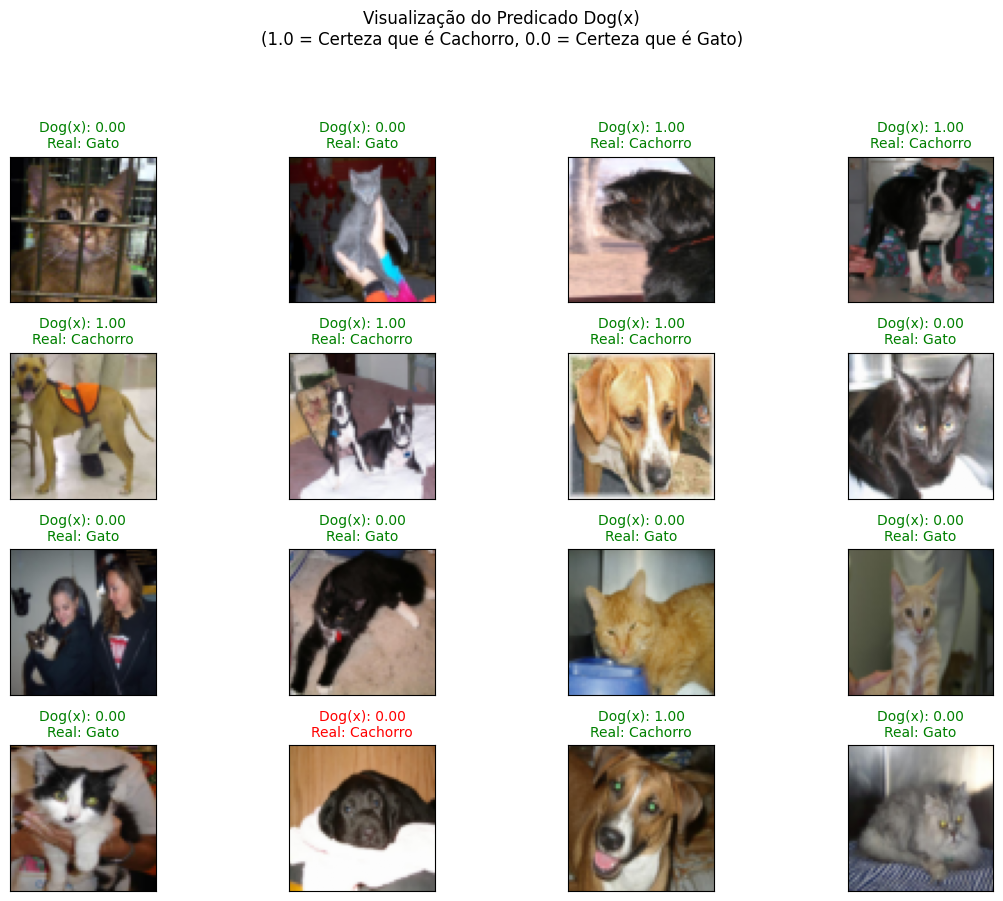

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def visualizar_predicoes(loader, predicate_model, device):
    # 1. Pega um batch de imagens do carregador
    dataiter = iter(loader)
    images, labels = next(dataiter)

    # Move para o dispositivo (GPU/CPU)
    images = images.to(ltntorch.device)

    # 2. Calcula a predição (Grau de verdade para "É um cachorro?")
    # Usamos o modelo interno do predicado diretamente para facilitar a visualização
    # O predicado LTN espera Variáveis, mas o modelo interno (CNN) aceita Tensores puros
    with torch.no_grad():
        # O modelo retorna um valor entre 0 e 1 (devido ao Sigmoid final)
        preds = predicate_model.model(images).squeeze()

    # 3. Configuração do Plot
    fig = plt.figure(figsize=(12, 8))

    # Mostra as primeiras 16 imagens do batch
    num_images = 16
    for idx in range(num_images):
        ax = fig.add_subplot(4, 4, idx + 1, xticks=[], yticks=[])

        # Converte a imagem de Tensor (C, H, W) para formato Matplotlib (H, W, C)
        # e move para CPU numpy
        img = images[idx].cpu().permute(1, 2, 0).numpy()

        # Plota a imagem
        ax.imshow(img)

        # Pega o score e o label real
        score = preds[idx].item()
        label_real = labels[idx].item() # 0=Gato, 1=Cachorro
        nome_real = "Cachorro" if label_real == 1 else "Gato"

        # Consideramos acerto se (score > 0.5 e é cachorro) ou (score < 0.5 e é gato)
        prediction_class = 1 if score > 0.5 else 0
        color = "green" if prediction_class == label_real else "red"

        # Título: Score LTN e Label Real
        ax.set_title(f"Dog(x): {score:.2f}\nReal: {nome_real}", color=color, fontsize=10)

    plt.tight_layout()
    plt.suptitle("Visualização do Predicado Dog(x)\n(1.0 = Certeza que é Cachorro, 0.0 = Certeza que é Gato)", y=1.12)
    plt.show()

# Passamos o DataLoader, o Predicado LTN (Dog) e o dispositivo
visualizar_predicoes(train_loader, Dog, ltntorch.device)